## Findings


* 1. Relative to the population black people are Fatally shot more often by Police, while White people are less often Fatally shot.

* 2. More people are perceived to be a threat level = Attack when police are not carrying a body camera.
        
        * 2.1 Is the lack of body camera leading to more people than necessary being fatally shot? Where they really a threat?

* 3. A higher percentage of people fatally shot who are of Black decent are younger than people from White decent* 
        
        * 3.1 In hindsight this could/should have been explored more, by filtering the data for ages below 30 or 40 and seeing if that would change any of the outcomes from the analysis. 

Use this code below to test this out yourself 
       ```df = df[df["age]<30]``` 





In [712]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime


from scipy import stats

sns.set_style("darkgrid")

# Structure of imports 
%matplotlib inline

In [713]:
df = pd.read_csv("database.csv")

In [714]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [715]:
df.describe()

,id,age
count,2142.00000,2099.000000
mean,1232.21662,36.484516
std,670.62817,12.874000
min,3.00000,6.000000
25%,664.50000,26.000000
50%,1231.50000,34.000000
75%,1811.75000,45.000000
max,2394.00000,86.000000


In [716]:
df["date"] = pd.to_datetime(df["date"])

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2142 non-null   int64         
 1   name                     2123 non-null   object        
 2   date                     2142 non-null   datetime64[ns]
 3   manner_of_death          2142 non-null   object        
 4   armed                    2136 non-null   object        
 5   age                      2099 non-null   float64       
 6   gender                   2141 non-null   object        
 7   race                     2039 non-null   object        
 8   city                     2142 non-null   object        
 9   state                    2142 non-null   object        
 10  signs_of_mental_illness  2142 non-null   bool          
 11  threat_level             2142 non-null   object        
 12  flee                     2106 non-

In [718]:
df.nunique()

id                         2142
name                       2118
date                        739
manner_of_death               2
armed                        64
age                          71
gender                        2
race                          6
city                       1247
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

In [785]:
df[df[["name","state","armed","race","city"]].duplicated()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week,day_of_week_str,year,month
1934,2158,Daquan Antonio Westbrook,2016-12-24,shot,gun,18.0,M,Black,Charlotte,NC,False,undetermined,Not fleeing,False,5,sat,2016,12
2053,2294,Jamake Cason Thomas,2017-02-03,shot,gun,22.0,M,Black,Rowland,NC,False,attack,Car,False,4,fri,2017,2


In [788]:
df[df["name"] == "Jamake Cason Thomas"]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week,day_of_week_str,year,month
2049,2304,Jamake Cason Thomas,2017-02-03,shot,gun,22.0,M,Black,Rowland,NC,False,attack,Car,False,4,fri,2017,2
2053,2294,Jamake Cason Thomas,2017-02-03,shot,gun,22.0,M,Black,Rowland,NC,False,attack,Car,False,4,fri,2017,2


most nan values are in the race column. 

In [720]:
df.isna().sum()

id                           0
name                        19
date                         0
manner_of_death              0
armed                        6
age                         43
gender                       1
race                       103
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        36
body_camera                  0
dtype: int64

In [721]:
df[df["race"].isna()].head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,2015-01-25,shot,gun,59.0,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
241,244,John Marcell Allen,2015-03-30,shot,gun,54.0,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,2015-04-09,shot and Tasered,vehicle,54.0,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,2015-05-07,shot,knife,72.0,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
398,503,James Anthony Morris,2015-05-31,shot,gun,40.0,M,NaN,Medford,OR,True,attack,Not fleeing,False


Changing name value to John or Jane Doe where name is na depending on gender. 

In [722]:
df.loc[(df["name"].isnull()) & (df["gender"] == "M"), "name"] = "John Doe"
df.loc[(df["name"].isnull()) & (df["gender"] == "F"), "name"] = "Jane Doe"

One person is unnamed and gender is not known, will keep it in the dataset as other information is still there. 

In [723]:
df[df["name"].isna() == True]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2133,2384,NaN,2017-02-25,shot,gun,NaN,NaN,NaN,Lumpkin,GA,False,attack,Car,False


#### Gender and Fatal Police shootings

Most of the people in this dataset are men. What is the ratio?.

<Axes: xlabel='gender'>

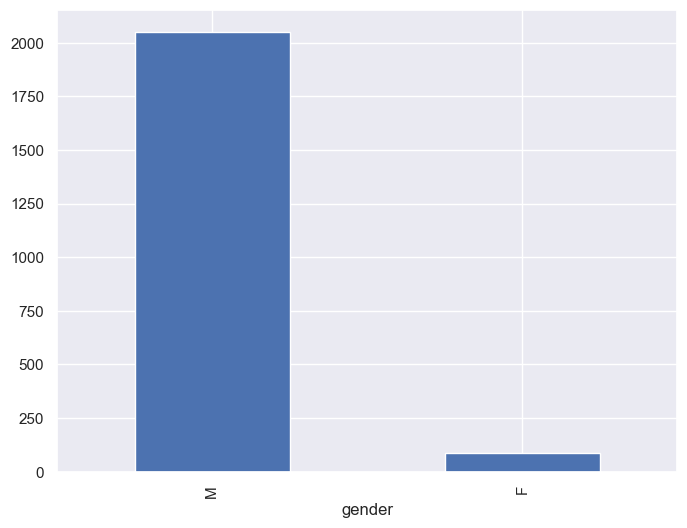

In [724]:
plt.figure(figsize=(8, 6))

df["gender"].value_counts().plot(kind="bar")

There are 23 occurrences of men for every woman in this dataset, while there are 17 unknown men for the 1 unknown woman in this dataset. From this its not possible to say wether or not men compared to women are more often unrecognizable. 

Checking the occurrence of John vs Jane Doe and comparing it to the occurrence of men vs women in this dataset. 

In [725]:
man, female = df["gender"].value_counts()
print(f"There are {man/female} men killed for every woman")

There are 23.0561797752809 men killed for every woman


In [726]:
john = df["name"].value_counts()["John Doe"]
jane = df["name"].value_counts()["Jane Doe"]

print(f"John Doe appears {john/jane} for every Jane Doe")

John Doe appears 17.0 for every Jane Doe


#### Race and Fatal Police Shootings

Most of the people who die from fatal police shootings are White, followed by black people and then hispanics. 

In [727]:
df["race"].value_counts()

race
W    1041
B     542
H     367
A      33
O      28
N      28
Name: count, dtype: int64

Changing the W, B, A etc. Race code to names for readability. 

In [728]:
df["race"].replace("W", "White", inplace=True)
df["race"].replace("B", "Black", inplace=True)
df["race"].replace("A", "Asian", inplace=True)
df["race"].replace("H", "Hispanic", inplace=True)
df["race"].replace("N", "Not Hispanic", inplace=True)
df["race"].replace("O", "Other", inplace=True)

/var/folders/dk/d3npzx0d78711ddgq33dpxgh0000gn/T/ipykernel_24431/1142009054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["race"].replace("W", "White", inplace=True)
/var/folders/dk/d3npzx0d78711ddgq33dpxgh0000gn/T/ipykernel_24431/1142009054.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

<Axes: xlabel='race'>

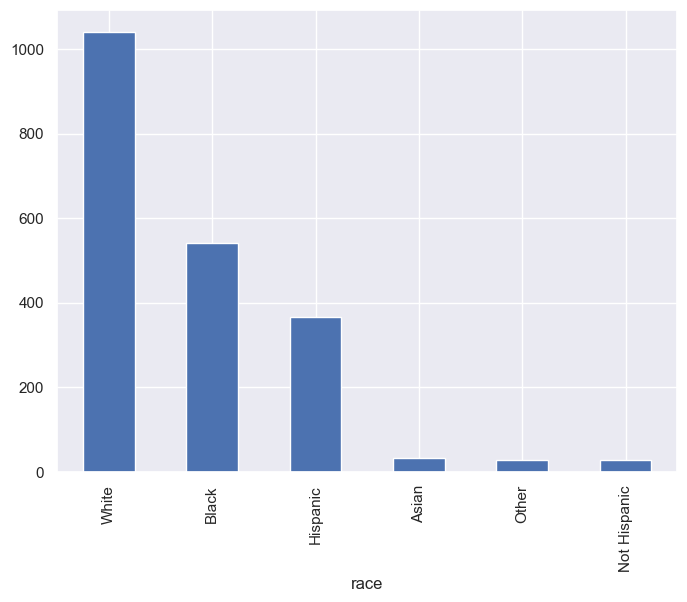

In [729]:
plt.figure(figsize=(8, 6))

df["race"].value_counts().plot(kind="bar")

#### Year, Month and Day of Week

Using datetime library to create a numerical and string column for day of week from the date column

In [730]:
df["day_of_week"] = 1

x = 0
for i in df["date"]:
    df.loc[x, "day_of_week"] = datetime.date.weekday(i)
    x += 1

df["day_of_week_str"] = df["day_of_week"]
replacements = {0: "mon", 1: "tue", 2: "wed", 3: "thu", 4: "fri", 5: "sat", 6: "sun"}
df["day_of_week_str"] = df["day_of_week_str"].map(replacements)

Most fatal police shootings happen on wednesdays, however there is not much of a difference between the day of week. 

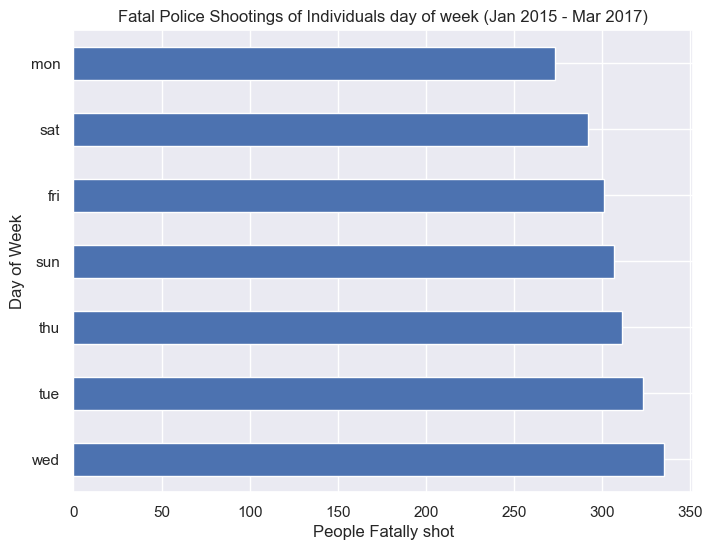

In [731]:
plt.figure(figsize=(8, 6))

g = df["day_of_week_str"].value_counts().plot(kind="barh")

g.set(
    xlabel="People Fatally shot",
    ylabel="Day of Week",
    title="Fatal Police Shootings of Individuals day of week (Jan 2015 - Mar 2017)",
)
plt.show();

Whats the date range for the data set ? 

In [732]:
mind = df["date"].min()
maxd = df["date"].max()

print(f"Start date = {mind}, end date = {maxd}")

Start date = 2015-01-02 00:00:00, end date = 2017-02-28 00:00:00


Making a year and month column 

In [733]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

No real difference in Fatal shooting between 2015 and 2016, 2017 has fewer shooting but the record ends in February, there are no grounds for comparing 2017 to 2015 adn 2016

In [734]:
df["year"].value_counts()

year
2015    991
2016    963
2017    188
Name: count, dtype: int64

If we multiply the fatal shootings from 2017 with 6, it would be seem like it was prone to have more fatal police shootings, a better comparison would be to look at the months for each of these years. 

In [735]:
y_2015, y_2016, y_2017 = df["year"].value_counts()

print(f"Following the trend of 2017, it could have {6*y_2017} fatal shootings")

Following the trend of 2017, it could have 1128 fatal shootings


There are more fatal police shootings in the start of 2017 compared to 2015 and 2016

In [736]:
y_15_m_1, y_15_m_2 = (
    df[(df["year"] == 2015) & (df["month"] < 3)]["month"].value_counts().sort_index()
)
y_16_m_1, y_16_m_2 = (
    df[(df["year"] == 2016) & (df["month"] < 3)]["month"].value_counts().sort_index()
)
y_17_m_1, y_17_m_2 = (
    df[(df["year"] == 2017) & (df["month"] < 3)]["month"].value_counts().sort_index()
)

print(
    f"The sum of fatal shootings for the first two months in 2015 = {y_15_m_1 + y_15_m_2}"
)
print(
    f"The sum of fatal shootings for the first two months in 2016 = {y_16_m_1 + y_16_m_2}"
)
print(
    f"The sum of fatal shootings for the first two months in 2017 = {y_17_m_1 + y_17_m_2}"
)

The sum of fatal shootings for the first two months in 2015 = 153
The sum of fatal shootings for the first two months in 2016 = 167
The sum of fatal shootings for the first two months in 2017 = 188


Creating two series and combining them into a new dataframe for total shootings per month for 2015 and 2016

In [737]:
shootins_2015 = df[df["year"] == 2015]["month"].value_counts().sort_index()

In [738]:
shootins_2016 = df[df["year"] == 2016]["month"].value_counts().sort_index()

In [739]:
shootings_per_year = pd.DataFrame({"2015": shootins_2015, "2016": shootins_2016})
shootings_per_year.sum()

2015    991
2016    963
dtype: int64

Increase in total fatal shootings for January and February does not translate to more fatal shootings later in the year. 

Overall there where fewer shootings in 2016, compared to 2015. 

<Figure size 800x600 with 0 Axes>

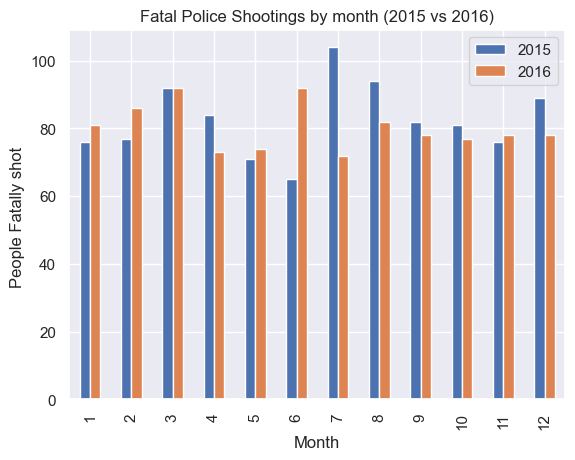

In [740]:
plt.figure(figsize=(8, 6))

g = shootings_per_year.plot(kind="bar")

g.set(
    xlabel="Month",
    ylabel="People Fatally shot ",
    title="Fatal Police Shootings by month (2015 vs 2016)",
)
plt.show();

#### Making pairplots to look for trends in the dataset 

No clear trends can be seen from an initial PairPlot

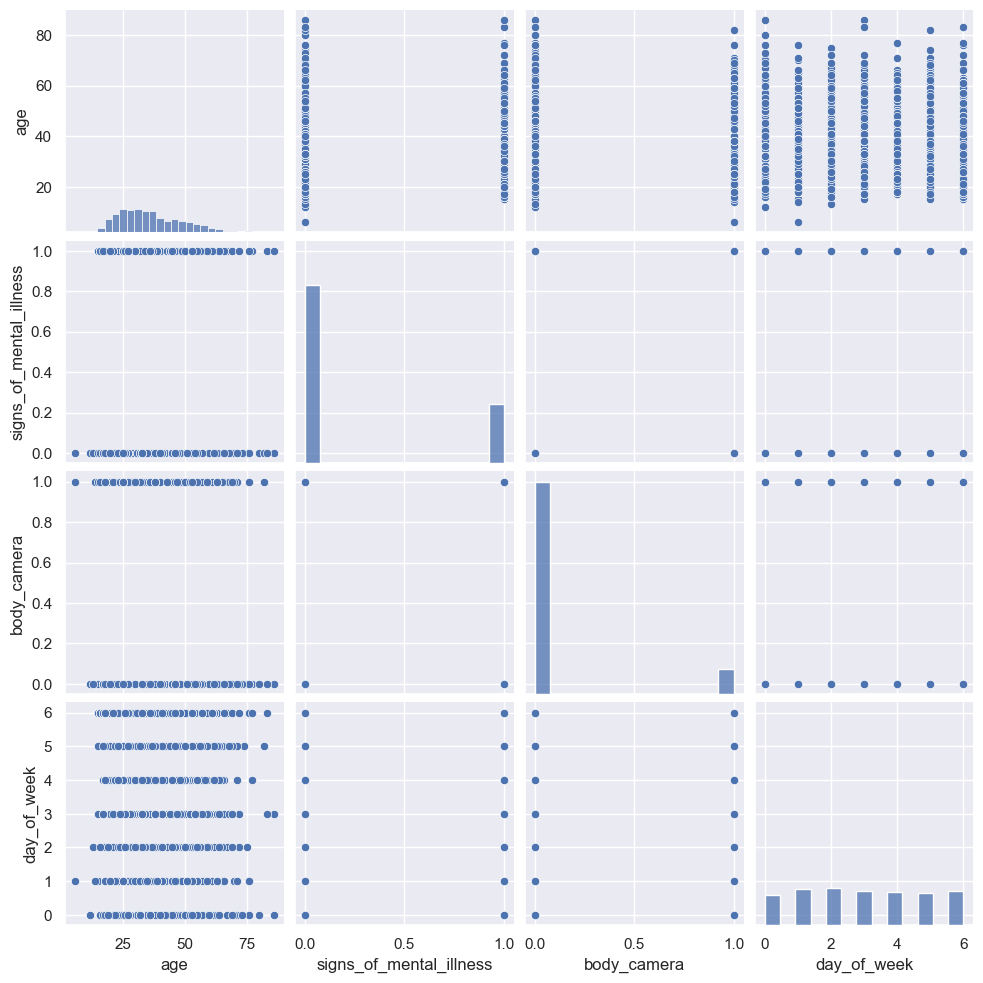

In [789]:
sns.pairplot(df.drop(["id","year","month"], axis=1))

Expanding the Pairplot to include race as well. Hard to see any trends, however diving deeper into the correlation between race and age might be fruitful. 

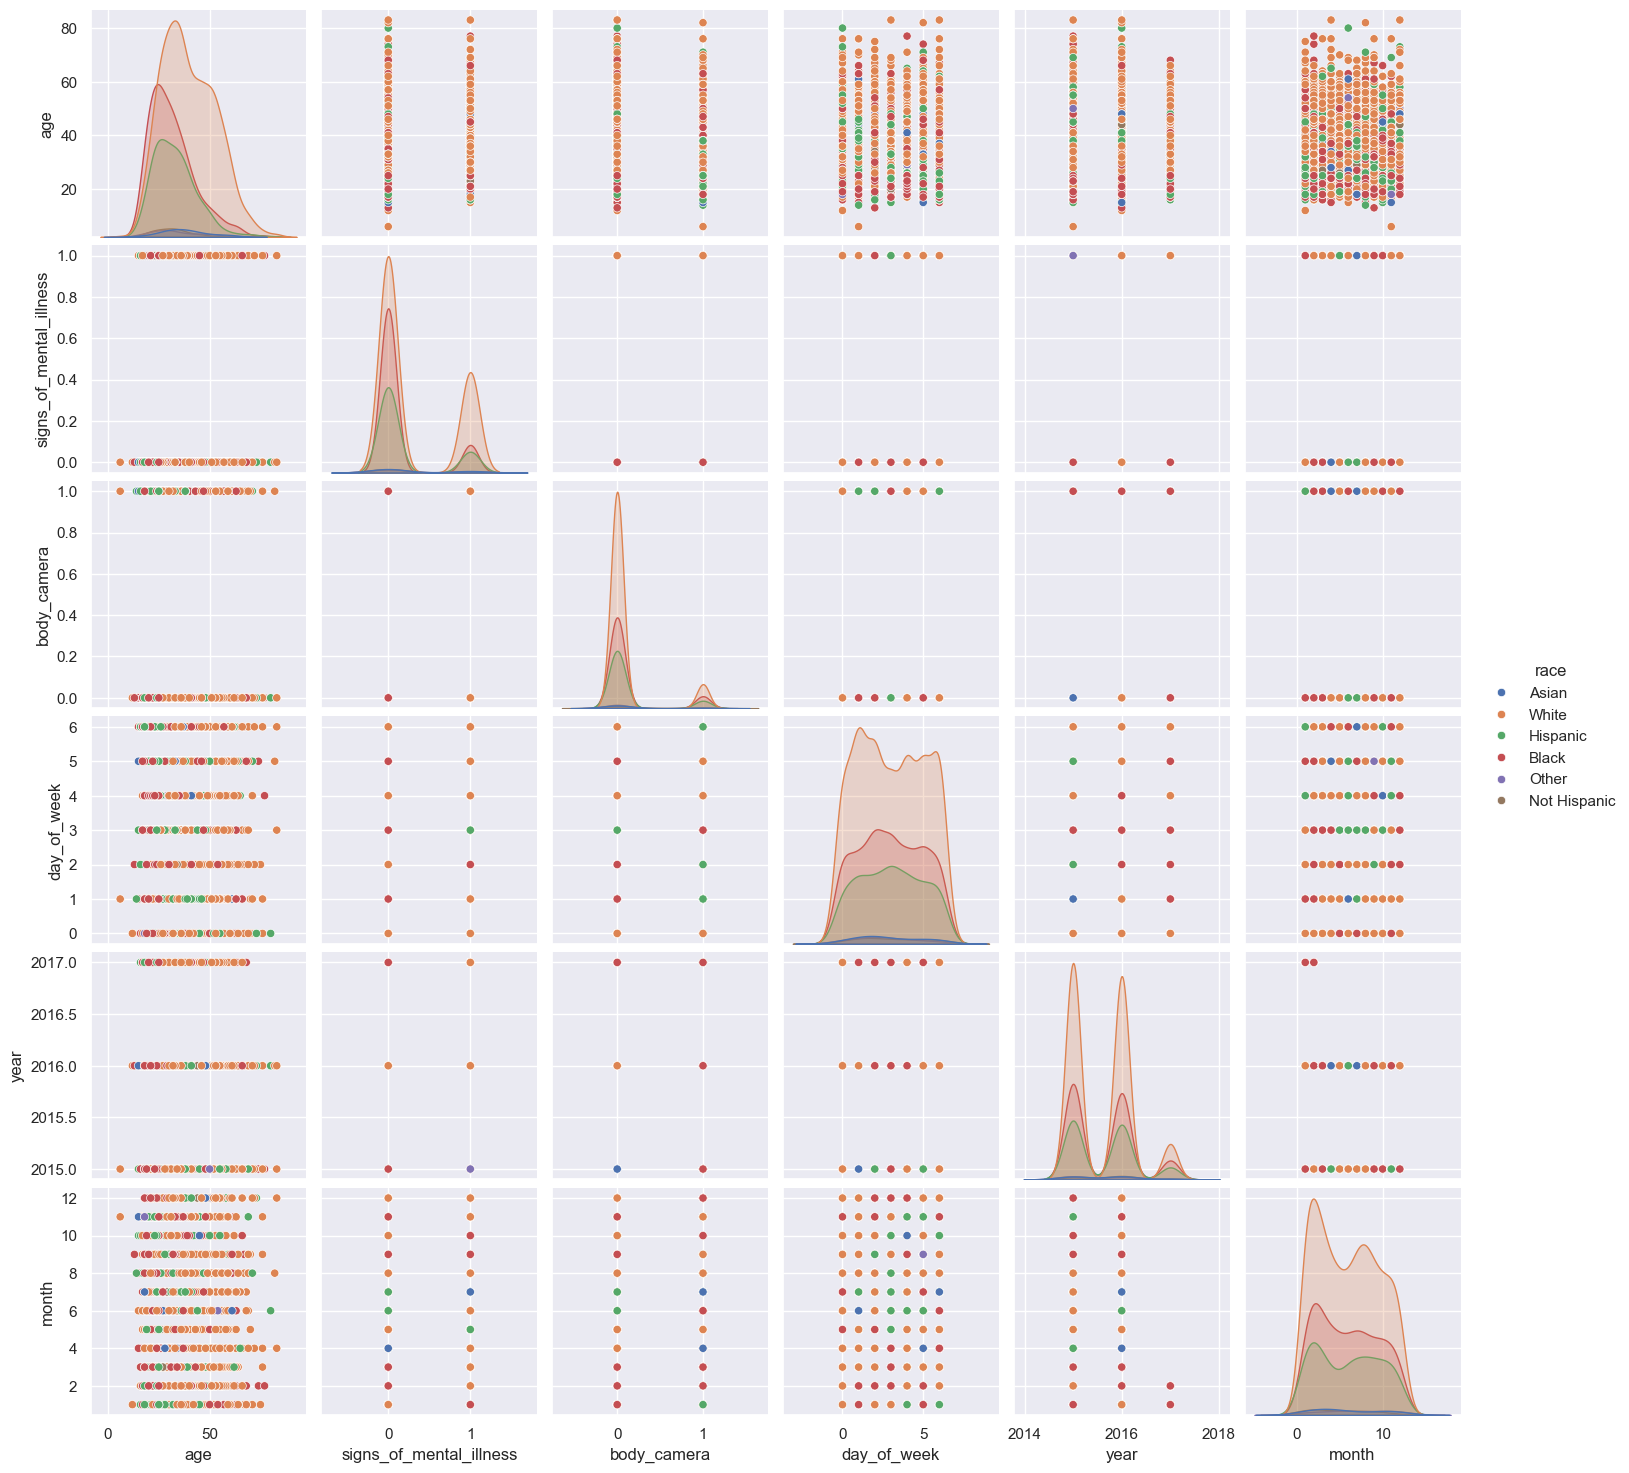

In [742]:
sns.pairplot(df.drop(["id"], axis=1), hue="race")

State and Age might be worth looking further into, as one state has a high peak for age. Or does it simply come from the fact that some states have a higher amount of fatal police shootings ? 

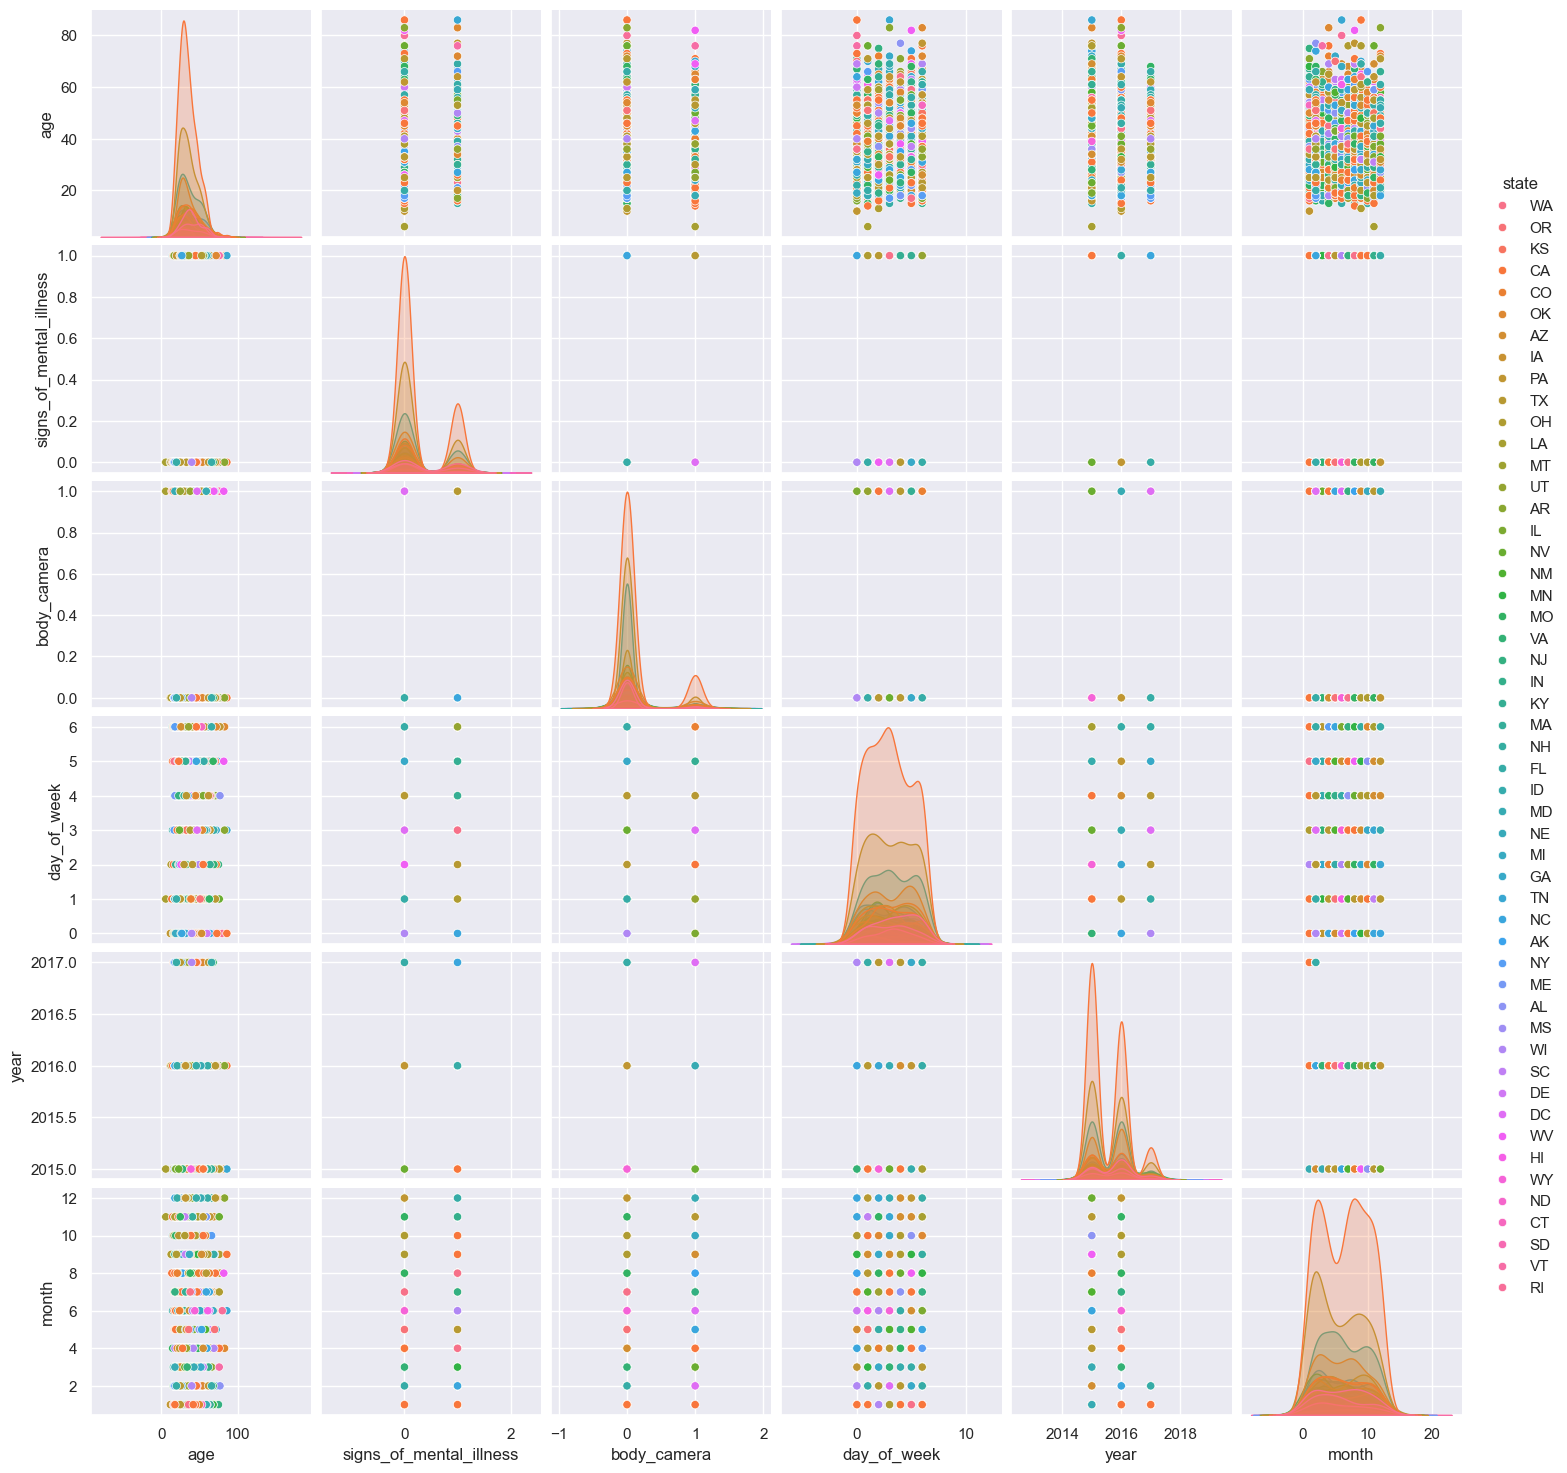

In [743]:
sns.pairplot(df.drop(["id"], axis=1), hue="state")

No correlation between the different columns in the dataset, some weak negative correlation between month and year.

In [744]:
df[
    ["age", "signs_of_mental_illness", "body_camera", "day_of_week", "year", "month"]
].corr() # Look at difference of correlation factors. 

,age,signs_of_mental_illness,body_camera,day_of_week,year,month
age,1.000000,0.116553,0.001372,0.006038,-0.023980,0.017973
signs_of_mental_illness,0.116553,1.000000,0.015188,0.022795,-0.034324,-0.056453
body_camera,0.001372,0.015188,1.000000,0.010243,0.068079,-0.022746
day_of_week,0.006038,0.022795,0.010243,1.000000,0.009344,0.003284
year,-0.023980,-0.034324,0.068079,0.009344,1.000000,-0.278984
month,0.017973,-0.056453,-0.022746,0.003284,-0.278984,1.000000


Most fatal police shootings happen in the states: California, Texas, Florida, Arizona and Oklahoma. 

In the Cities: Los Angeles, Houston, Phoenix, Chicago and Austin. 

The Cities Los Angeles (CA), Houston(TX), Austin(TX) and Phoenix(AZ) are all part of the top states with most fatal police shootings while Chicago being the only city thats not part of a state in top 5. 

In [745]:
df["state"].value_counts().sort_values(ascending=False).head(5)

state
CA    355
TX    197
FL    129
AZ     95
OK     65
Name: count, dtype: int64

In [746]:
df["city"].value_counts().sort_values(ascending=False).head(5)

city
Los Angeles    31
Houston        24
Phoenix        24
Chicago        23
Austin         16
Name: count, dtype: int64

## Age and Fatal Police shootings

Most people who died from fatal police shootings are between the ages of 20 and 40

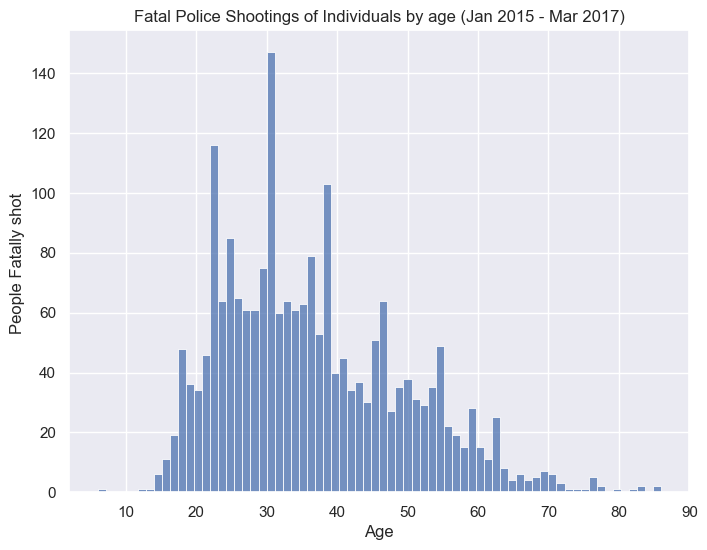

In [747]:
plt.figure(figsize=(8, 6))

g = sns.histplot(df["age"], bins=70)

g.set(
    xlabel="Age",
    ylabel="People Fatally shot ",
    title="Fatal Police Shootings of Individuals by age (Jan 2015 - Mar 2017)",
)
plt.show();

#### Age and state

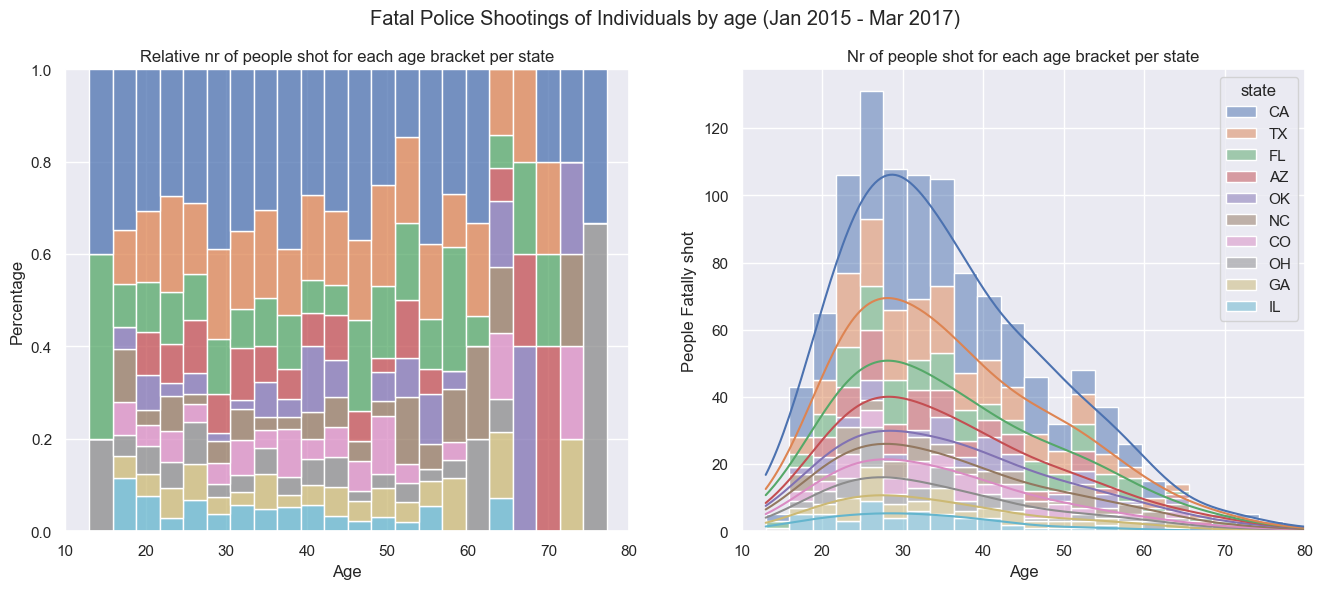

In [748]:
# plt.figure(figsize=(, 14))

fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
state_order = (
    df["state"].value_counts().sort_values(ascending=False).index.to_list()[0:10]
)
g = sns.histplot(
    data=df[
        df["state"].isin(
            df["state"]
            .value_counts()
            .sort_values(ascending=False)
            .index.to_list()[0:10]
        )
    ],
    x="age",
    bins=25,
    hue="state",
    multiple="fill",
    ax=axs[0],
    legend=False,
    hue_order=state_order,
)

g2 = sns.histplot(
    data=df[
        df["state"].isin(
            df["state"]
            .value_counts()
            .sort_values(ascending=False)
            .index.to_list()[0:10]
        )
    ],
    x="age",
    bins=25,
    hue="state",
    multiple="stack",
    ax=axs[1],
    kde=True,
    hue_order=state_order,
)

g.set(
    xlabel="Age",
    ylabel="Percentage",
    title="Relative nr of people shot for each age bracket per state",
)
g2.set(
    xlabel="Age",
    ylabel="People Fatally shot",
    title="Nr of people shot for each age bracket per state",
)

g.set_xlim(10, 80)
g2.set_xlim(10, 80)

plt.suptitle("Fatal Police Shootings of Individuals by age (Jan 2015 - Mar 2017)")


plt.show();

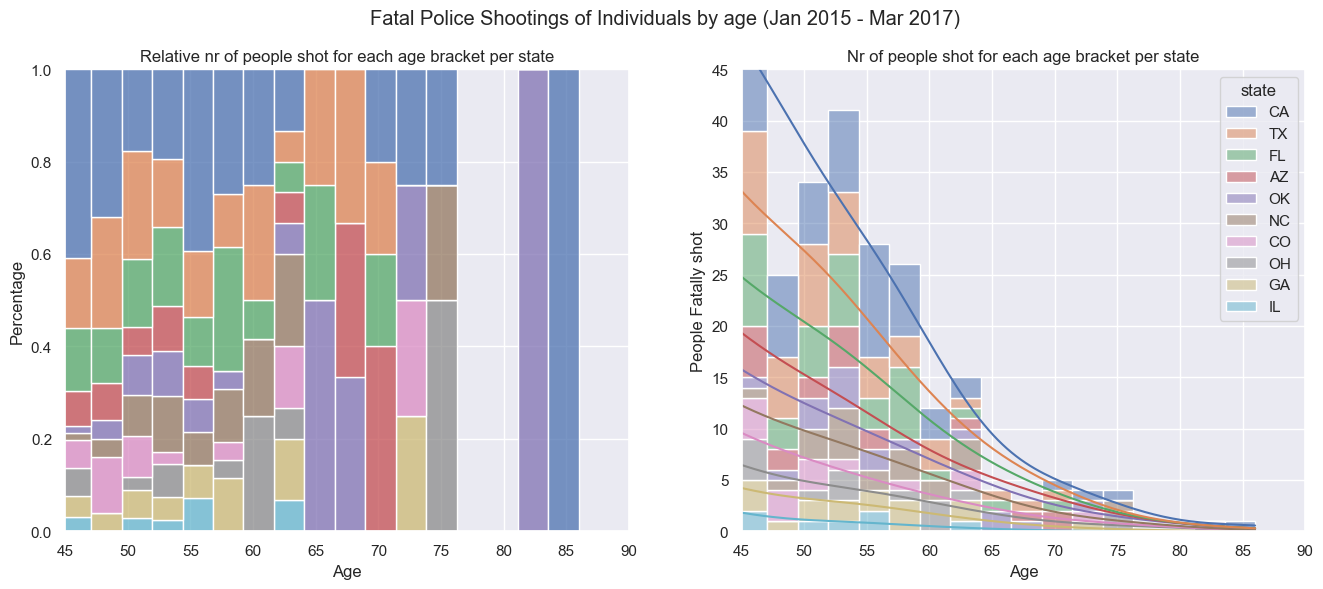

In [749]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
state_order = (
    df["state"].value_counts().sort_values(ascending=False).index.to_list()[0:10]
)

g = sns.histplot(
    data=df[
        df["state"].isin(
            df["state"]
            .value_counts()
            .sort_values(ascending=False)
            .index.to_list()[0:10]
        )
    ],
    x="age",
    bins=30,
    hue="state",
    multiple="fill",
    ax=axs[0],
    legend=False,
    hue_order=state_order,
)

g2 = sns.histplot(
    data=df[
        df["state"].isin(
            df["state"]
            .value_counts()
            .sort_values(ascending=False)
            .index.to_list()[0:10]
        )
    ],
    x="age",
    bins=30,
    hue="state",
    multiple="stack",
    ax=axs[1],
    hue_order=state_order,
    kde=True,
)

g.set(
    xlabel="Age",
    ylabel="Percentage",
    title="Relative nr of people shot for each age bracket per state",
)
g2.set(
    xlabel="Age",
    ylabel="People Fatally shot",
    title="Nr of people shot for each age bracket per state",
)

g.set_xlim(45, 90)
g2.set_xlim(45, 90)
g2.set_ylim(0, 45)

plt.suptitle("Fatal Police Shootings of Individuals by age (Jan 2015 - Mar 2017)")


plt.show();

#### Age and Race

White people are fatally shot more often at all ages except for ages below 30

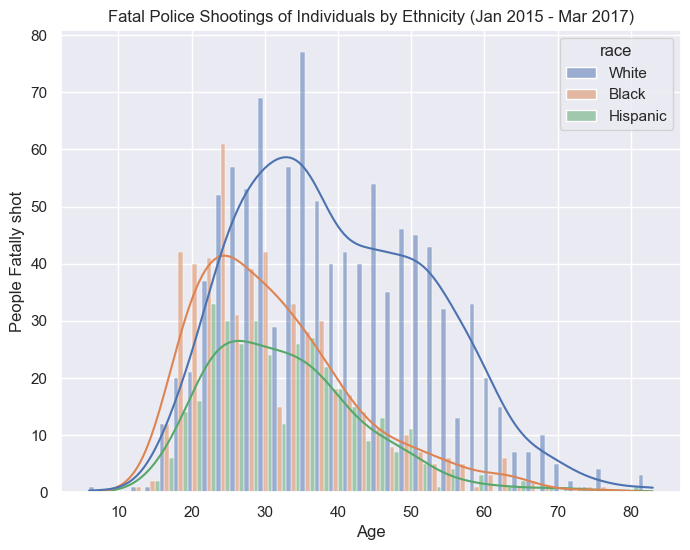

In [750]:
df_b_w_h = df[
    (df["race"] == "Black") | (df["race"] == "White") | (df["race"] == "Hispanic")
]
plt.figure(figsize=(8, 6))

g = sns.histplot(
    data=df_b_w_h,
    x="age",
    bins=40,
    hue="race",
    multiple="dodge",
    hue_order=("White", "Black", "Hispanic"),
    kde=True,
)

g.set(
    xlabel="Age",
    ylabel="People Fatally shot",
    title="Fatal Police Shootings of Individuals by Ethnicity (Jan 2015 - Mar 2017)",
)
plt.show();

Black people are shot more often, from ages 25 and below. 

Why? 

What does these data indicate? 
1. Most of the people who died due to Fatal Police shootings are White
2. This is true for all age groups, except for ages below 25. 
3. There are a few outliers at younger ages, below 15 there are 2 whites, 1 black, and 1 hispanic person shot. 

Why are more white people shot? 
Looking at the demographic of the US https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States. Roughly 60% of the population is White, 19% is Hispanic and 13% are Black. 

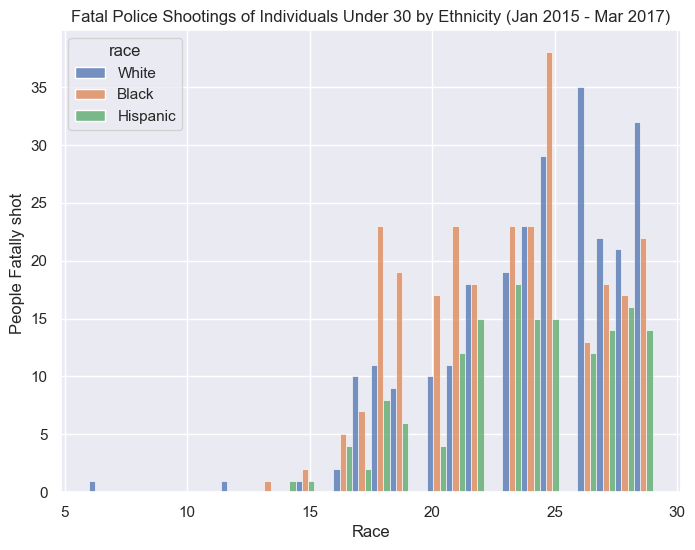

In [751]:
plt.figure(figsize=(8, 6))

g = sns.histplot(
    data=df_b_w_h[df_b_w_h["age"] < 30],
    x="age",
    bins=30,
    hue="race",
    multiple="dodge",
    hue_order=("White", "Black", "Hispanic"),
)

g.set(
    xlabel="Race",
    ylabel="People Fatally shot ",
    title="Fatal Police Shootings of Individuals Under 30 by Ethnicity (Jan 2015 - Mar 2017)",
)
plt.show();

The mean age of both blacks and hispanics is lower than for whites. The spread in age is also less for both hispanics and blacks.

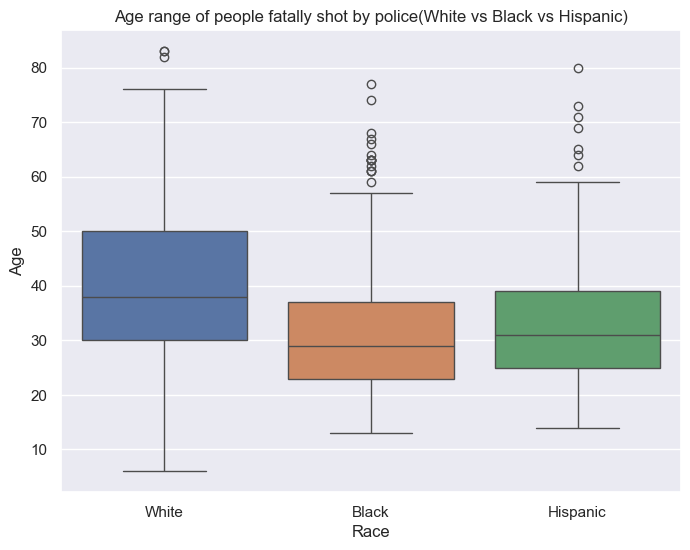

In [752]:
fig = plt.figure(figsize=(8, 6))
race_ls = ["White", "Black", "Hispanic"]
g = sns.boxplot(
    x="race",
    y="age",
    data=df[df["race"].isin(race_ls)],
    order=race_ls,
    hue="race",
    hue_order=race_ls,
)
g.set(xlabel="Race", ylabel="Age")
plt.title("Age range of people fatally shot by police(White vs Black vs Hispanic)")
plt.show();

In [753]:
df.groupby("race")["age"].mean()

race
Asian           37.562500
Black           31.589888
Hispanic        32.958449
Not Hispanic    31.214286
Other           33.071429
White           39.746860
Name: age, dtype: float64

# Race

Keeping in mind that roughly 60% of the US population is White, 19% is hispanic and 12% is black. Black people seem to be overrepresented in fatal police shootings considering they make up roughly 27% of Fatal shootings in this dataset, while White people are somewhat under represented as they constitute 50% of fatal shootings from this dataset. 

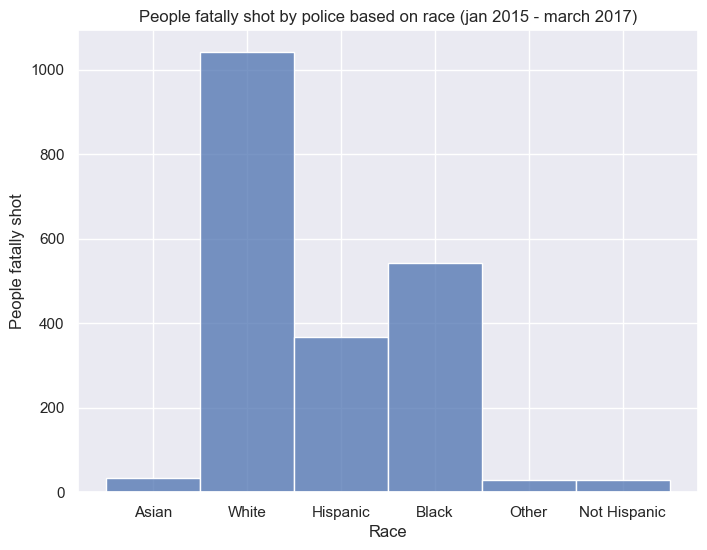

In [754]:
plt.figure(figsize=(8, 6))

g = sns.histplot(df["race"])

g.set(
    xlabel="Race",
    ylabel="People fatally shot",
    title="People fatally shot by police based on race (jan 2015 - march 2017)",
)
plt.show();

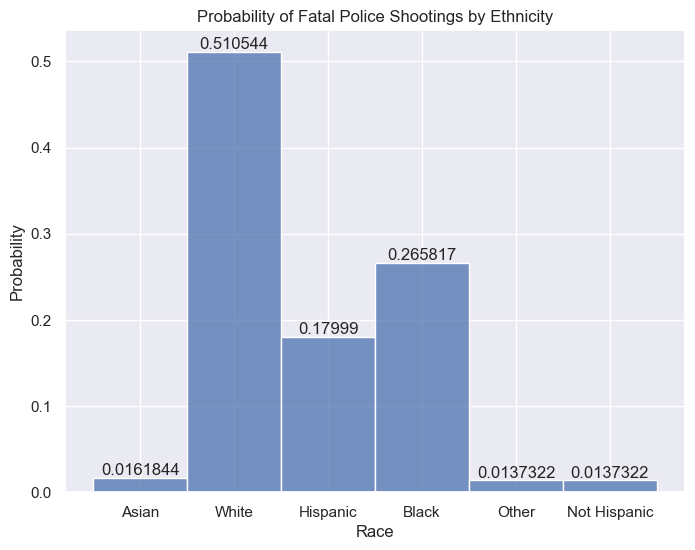

In [755]:
plt.figure(figsize=(8, 6))

g = sns.histplot(df["race"], discrete=True, stat="probability")

for i in g.containers:
    g.bar_label(
        i,
    )

g.set(
    xlabel="Race",
    ylabel="Probability",
    title="Probability of Fatal Police Shootings by Ethnicity",
)
plt.show();

ValueError: Could not interpret value `race` for `hue`. Value is a string, but `data` was not passed.

<Figure size 800x600 with 0 Axes>

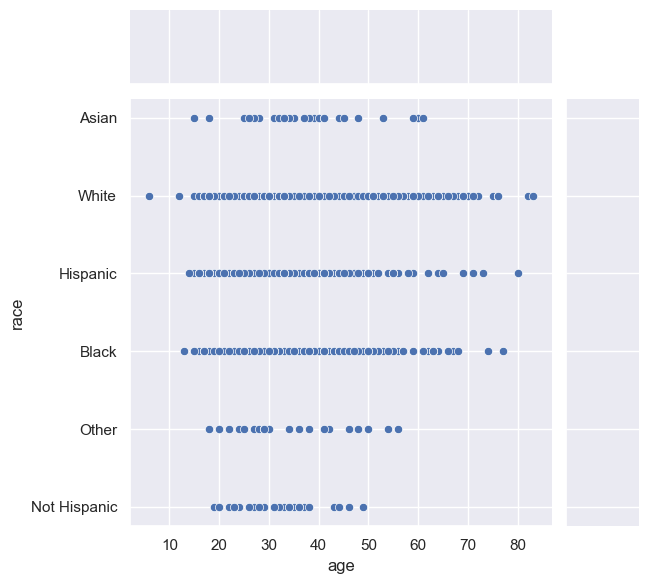

In [790]:
plt.figure(figsize=(8, 6))

g = sns.JointGrid(data=df, x="age", y="race")
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, edgecolor=".1", linewidth=1, kde=True,hue="race")

g.set_axis_labels(xlabel="Age", ylabel="Race")
g.fig.suptitle(
    "Relation between age and Race for people Fatally shot by police (jan 2015 - march 2017)"
)
g.fig.subplots_adjust(top=0.95)

plt.show();

#### Race and State

The idea of the plot below is to show the relation between state and ethnicity. 
If you change the state_range from 15 to 50 you'll see that some states have no fatal shootings of certain ethnicity. The figure is already confusing enough and isn't really showing what I'd like it to show, but with 50 states it is even more cluttered. I would appreciate some feedback on this one specifically if you reviewing this has any idea how to visualize this in a better way. 



<Figure size 800x600 with 0 Axes>

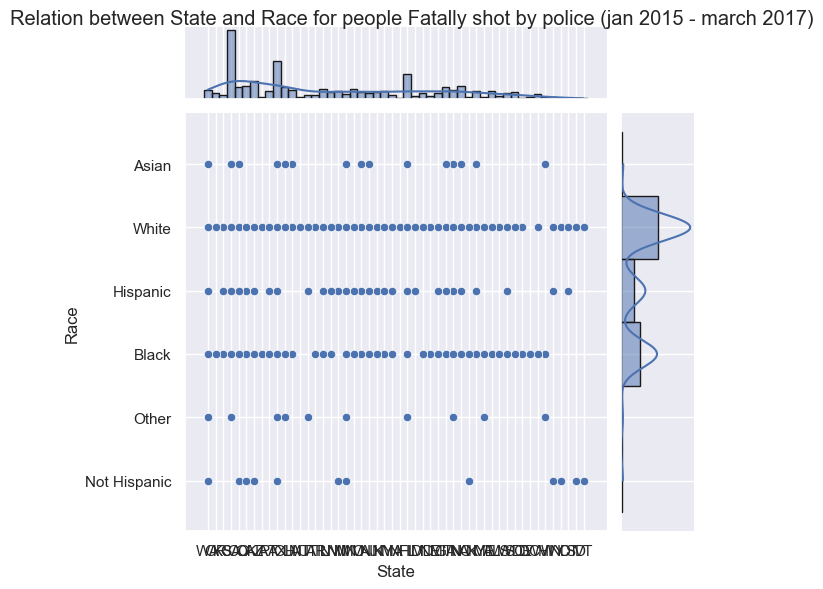

In [757]:
state_range = 50  # Change this value


plt.figure(figsize=(8, 6))
g = sns.JointGrid(
    data=df[
        df["state"].isin(
            df["state"]
            .value_counts()
            .sort_values(ascending=False)
            .index.to_list()[0:state_range]
        )
    ],
    x="state",
    y="race",
)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, edgecolor=".1", linewidth=1, kde=True)

g.set_axis_labels(xlabel="State", ylabel="Race")
g.fig.suptitle(
    "Relation between State and Race for people Fatally shot by police (jan 2015 - march 2017)"
)
g.fig.subplots_adjust(top=0.95)

plt.show();

#### Race and Threat level

Perceived threat level as attack is similar for both White and Black people, Hispanics are however more often not perceived as threat level = Attack

In [758]:
b_attack, b_other, b_undetermined = df[df["race"] == "Black"][
    "threat_level"
].value_counts()
print("For Blacks")
print("_" * 60)
print(
    "Percentage of threat level recorded as attack = "
    + str(round((b_attack / (b_attack + b_other + b_undetermined) * 100), 2))
    + "%"
)
print(
    "Percentage of threat level recorded as other = "
    + str(round((b_other / (b_attack + b_other + b_undetermined) * 100), 2))
    + "%"
)
print(
    "Percentage of threat level recorded as undetermined = "
    + str(round((b_undetermined / (b_attack + b_other + b_undetermined) * 100), 2))
    + "%"
)

For Blacks
____________________________________________________________
Percentage of threat level recorded as attack = 66.97%
Percentage of threat level recorded as other = 26.38%
Percentage of threat level recorded as undetermined = 6.64%


In [759]:
w_attack, w_other, w_undetermined = df[df["race"] == "White"][
    "threat_level"
].value_counts()
print("For Whites")
print("_" * 60)
print(
    "Percentage of threat level recorded as attack = "
    + str(round((w_attack / (w_attack + w_other + w_undetermined) * 100), 2))
    + "%"
)
print(
    "Percentage of threat level recorded as other = "
    + str(round((w_other / (w_attack + w_other + w_undetermined) * 100), 2))
    + "%"
)
print(
    "Percentage of threat level recorded as undetermined = "
    + str(round((w_undetermined / (w_attack + w_other + w_undetermined) * 100), 2))
    + "%"
)

For Whites
____________________________________________________________
Percentage of threat level recorded as attack = 66.67%
Percentage of threat level recorded as other = 28.53%
Percentage of threat level recorded as undetermined = 4.8%


In [760]:
h_attack, h_other, h_undetermined = df[df["race"] == "Hispanic"][
    "threat_level"
].value_counts()
print("For Hispanics")
print("_" * 60)
print(
    "Percentage of threat level recorded as attack = "
    + str(round((h_attack / (h_attack + h_other + h_undetermined) * 100), 2))
    + "%"
)
print(
    "Percentage of threat level recorded as other = "
    + str(round((h_other / (h_attack + h_other + h_undetermined) * 100), 2))
    + "%"
)
print(
    "Percentage of threat level recorded as undetermined = "
    + str(round((h_undetermined / (h_attack + h_other + h_undetermined) * 100), 2))
    + "%"
)

For Hispanics
____________________________________________________________
Percentage of threat level recorded as attack = 58.58%
Percentage of threat level recorded as other = 32.7%
Percentage of threat level recorded as undetermined = 8.72%


#### Threat level and Body cam

More incidents are recorded as a threat when police are not carrying a body camera.

Most of the fatal police shootings recorded had no body camera.


In [761]:
bc_attack, bc_other, bc_undetermined = df[df["body_camera"] == True][
    "threat_level"
].value_counts()
print("When Police have a body camera")
print("_" * 60)
print(
    "Percentage of threat level recorded as attack = "
    + str(round((bc_attack / (bc_attack + bc_other + bc_undetermined) * 100), 2))
    + "%"
)
print(
    "Percentage of threat level recorded as other = "
    + str(round((bc_other / (bc_attack + bc_other + bc_undetermined) * 100), 2))
    + "%"
)
print(
    "Percentage of threat level recorded as undetermined = "
    + str(round((bc_undetermined / (bc_attack + bc_other + bc_undetermined) * 100), 2))
    + "%"
)
sum_bc = bc_attack + bc_other + bc_undetermined
print("_" * 60)
print(f"Total recorded incidents where police carried a body camera = {sum_bc}")

When Police have a body camera
____________________________________________________________
Percentage of threat level recorded as attack = 54.15%
Percentage of threat level recorded as other = 41.05%
Percentage of threat level recorded as undetermined = 4.8%
____________________________________________________________
Total recorded incidents where police carried a body camera = 229


In [762]:
no_bc_attack, no_bc_other, no_bc_undetermined = df[df["body_camera"] == False][
    "threat_level"
].value_counts()
print("When Police have no body camera")
print("_" * 60)
print(
    "Percentage of threat level recorded as attack = "
    + str(
        round(
            (no_bc_attack / (no_bc_attack + no_bc_other + no_bc_undetermined) * 100), 2
        )
    )
    + "%"
)
print(
    "Percentage of threat level recorded as other = "
    + str(
        round(
            (no_bc_other / (no_bc_attack + no_bc_other + no_bc_undetermined) * 100), 2
        )
    )
    + "%"
)
print(
    "Percentage of threat level recorded as undetermined = "
    + str(
        round(
            (
                no_bc_undetermined
                / (no_bc_attack + no_bc_other + no_bc_undetermined)
                * 100
            ),
            2,
        )
    )
    + "%"
)

sum_no_bc = no_bc_attack + no_bc_other + no_bc_undetermined
print("_" * 60)
print(f"Total recorded incidents where police carried no body camera = {sum_no_bc}")

When Police have no body camera
____________________________________________________________
Percentage of threat level recorded as attack = 65.71%
Percentage of threat level recorded as other = 27.97%
Percentage of threat level recorded as undetermined = 6.33%
____________________________________________________________
Total recorded incidents where police carried no body camera = 1913


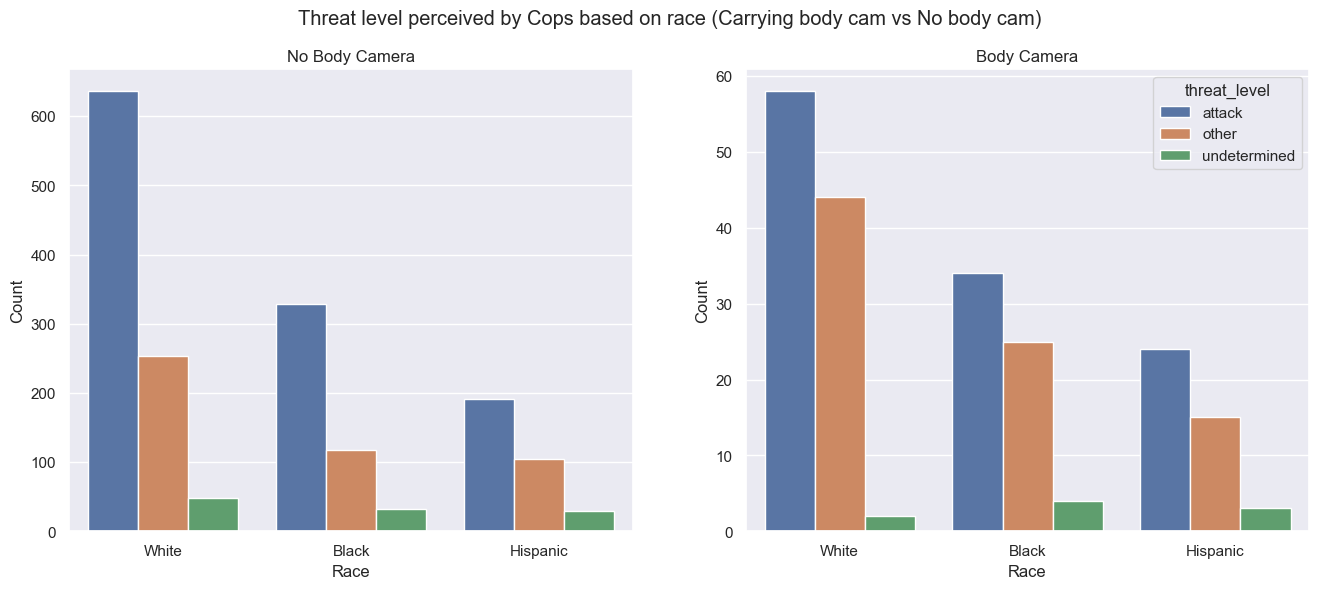

In [763]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

no_body_cam_df = df[df["body_camera"] == False]
body_cam_df = df[df["body_camera"] == True]

race_ls = ["White", "Black", "Hispanic"]
threat_order = ["attack", "other", "undetermined"]
g = sns.countplot(
    data=no_body_cam_df[no_body_cam_df["race"].isin(race_ls)],
    x="race",
    hue="threat_level",
    ax=axs[0],
    order=race_ls,
    hue_order=threat_order,
    legend=False,
)

g2 = sns.countplot(
    data=body_cam_df[body_cam_df["race"].isin(race_ls)],
    x="race",
    hue="threat_level",
    ax=axs[1],
    order=race_ls,
    hue_order=threat_order,
)
g.set(title="No Body Camera", xlabel="Race", ylabel="Count")
g2.set(title="Body Camera", xlabel="Race", ylabel="Count")
plt.suptitle(
    "Threat level perceived by Cops based on race (Carrying body cam vs No body cam)"
)

plt.show();

#### Signs of Mental illness and Body Cam

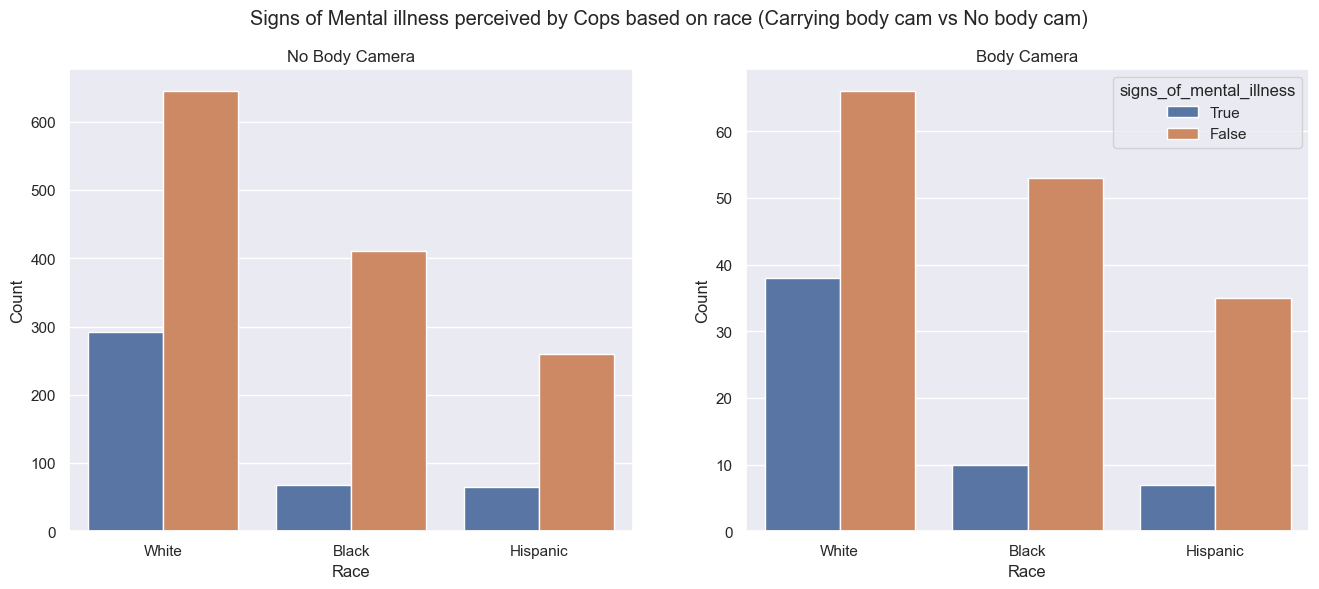

In [764]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

no_body_cam_df = df[df["body_camera"] == False]
body_cam_df = df[df["body_camera"] == True]

race_ls = ["White", "Black", "Hispanic"]
g = sns.countplot(
    data=no_body_cam_df[no_body_cam_df["race"].isin(race_ls)],
    x="race",
    hue="signs_of_mental_illness",
    ax=axs[0],
    order=race_ls,
    hue_order=[True, False],
    legend=False,
)

g2 = sns.countplot(
    data=body_cam_df[body_cam_df["race"].isin(race_ls)],
    x="race",
    hue="signs_of_mental_illness",
    ax=axs[1],
    order=race_ls,
    hue_order=[True, False],
)

g.set(title="No Body Camera", xlabel="Race", ylabel="Count")
g2.set(title="Body Camera", xlabel="Race", ylabel="Count")

plt.suptitle(
    "Signs of Mental illness perceived by Cops based on race (Carrying body cam vs No body cam)"
)

plt.show();

#### Race and Gender

The relative number of women shot by police are of Hispanic decent. While more are registered as Not Hispanic. 

(Using the Blue bar(White people) as a reference point)

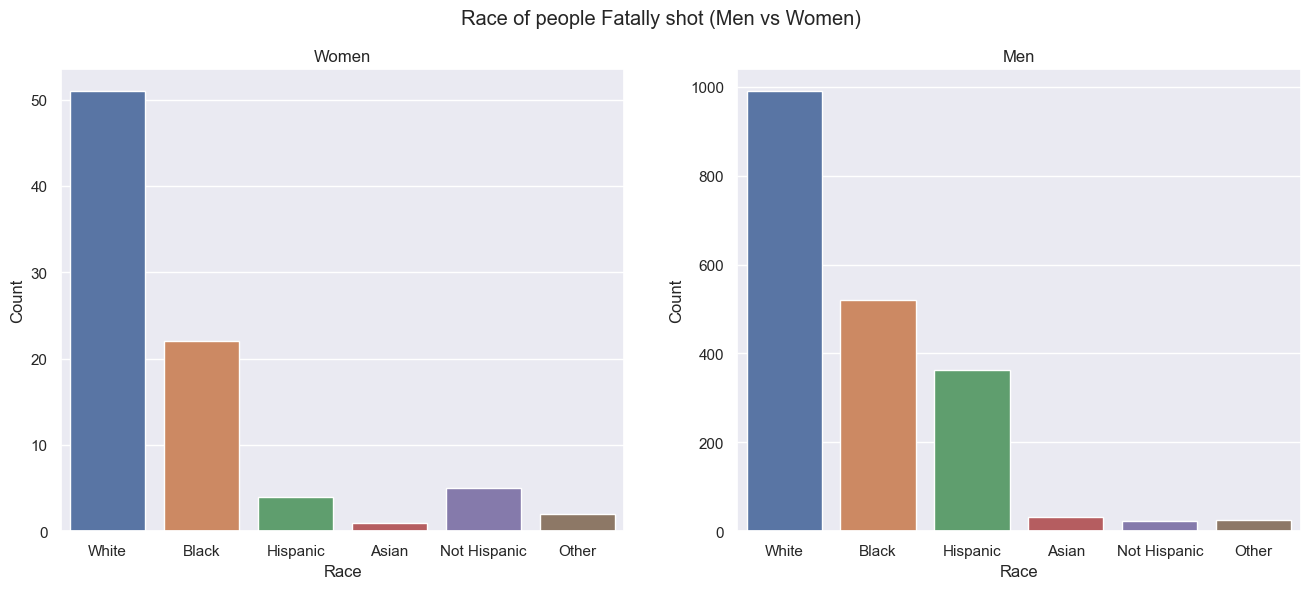

In [765]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
race_ls = ["White", "Black", "Hispanic", "Asian", "Not Hispanic", "Other"]


g = sns.countplot(
    data=df[df["gender"] == "F"],
    x="race",
    ax=axs[0],
    order=race_ls,
    hue="race",
    hue_order=race_ls,
    legend=False,
)
g2 = sns.countplot(
    data=df[df["gender"] == "M"],
    x="race",
    ax=axs[1],
    order=race_ls,
    hue="race",
    hue_order=race_ls,
    legend=False,
)
g.set(title="Women", xlabel="Race", ylabel="Count")
g2.set(title="Men", xlabel="Race", ylabel="Count")
plt.suptitle("Race of people Fatally shot (Men vs Women)")

plt.show();

## Armed

Most people who where fatally shot where armed with a gun.

/var/folders/dk/d3npzx0d78711ddgq33dpxgh0000gn/T/ipykernel_24431/1077400150.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


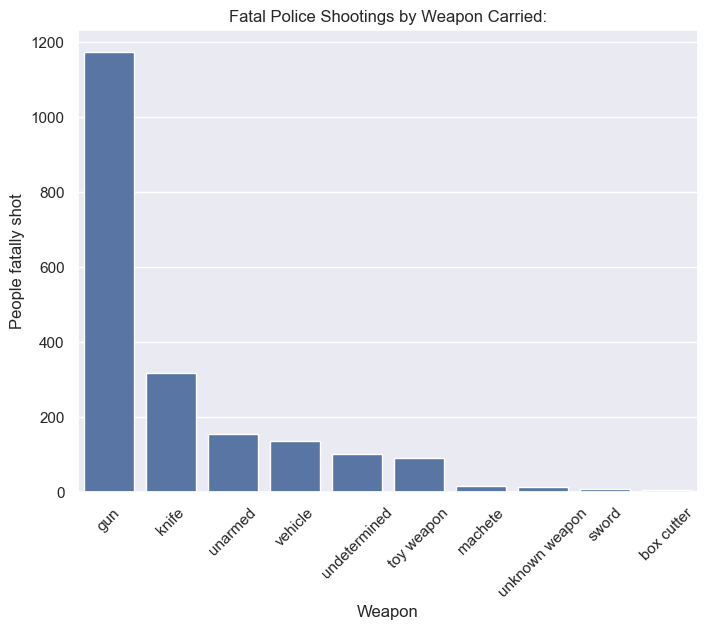

In [766]:
plt.figure(figsize=(8, 6))
g = sns.barplot(df["armed"].value_counts().sort_values(ascending=False).head(10))
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set(
    xlabel="Weapon",
    ylabel="People fatally shot",
    title="Fatal Police Shootings by Weapon Carried:",
)
plt.show();

## States

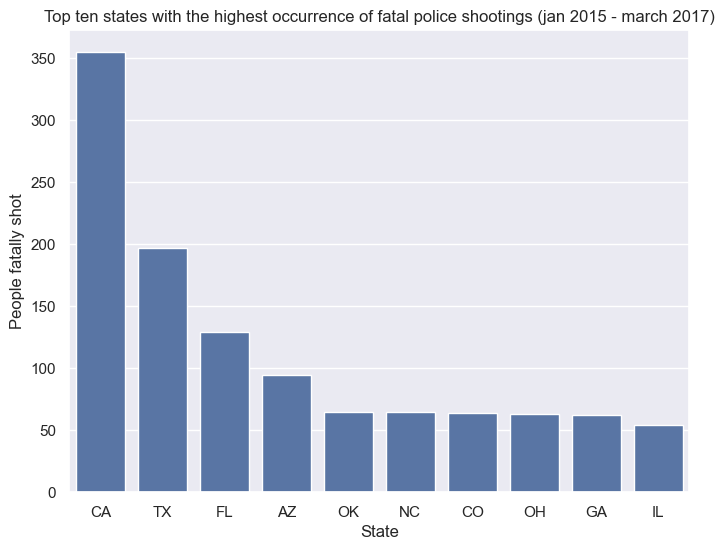

In [767]:
plt.figure(figsize=(8, 6))

g = sns.barplot(df["state"].value_counts().sort_values(ascending=False).head(10))

g.set(
    xlabel="State",
    ylabel="People fatally shot",
    title="Top ten states with the highest occurrence of fatal police shootings (jan 2015 - march 2017)",
)
plt.show();

/var/folders/dk/d3npzx0d78711ddgq33dpxgh0000gn/T/ipykernel_24431/1522652962.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


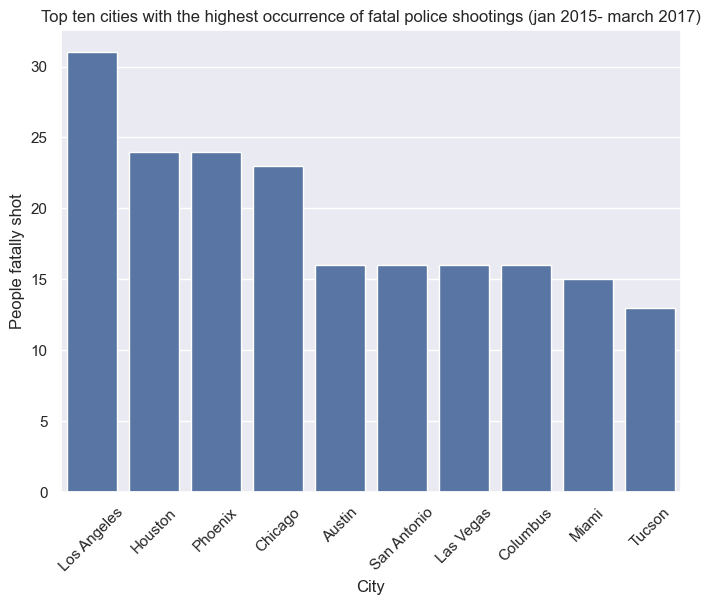

In [791]:
plt.figure(figsize=(8, 6))

g = sns.barplot(df["city"].value_counts().sort_values(ascending=False).head(10))
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set(
    xlabel="City",
    ylabel="People fatally shot",
    title="Top ten cities with the highest occurrence of fatal police shootings (jan 2015- march 2017)",
)
plt.show();

## Signs of Mental illness

Most people fatally shot had no signs of Mental illness, with around 25% having signs of mental illness. Most of the people fatally shot where armed with a gun, followed by people armed with a knife, unarmed, vehicle, undetermined and toy weapon. A higher percentage of people fatally shot who where armed with a toy weapon or knife showed signs of mental illness. 

In [769]:
no_soml, soml = df["signs_of_mental_illness"].value_counts()
print(f"Around {(soml/(soml+no_soml)*100)}% of people had signs of mental illness")

Around 24.743230625583568% of people had signs of mental illness


In [770]:
df["armed"].value_counts().sort_values(ascending=False).head(10)

armed
gun               1173
knife              319
unarmed            155
vehicle            136
undetermined       101
toy weapon          92
machete             16
unknown weapon      14
sword                8
box cutter           7
Name: count, dtype: int64

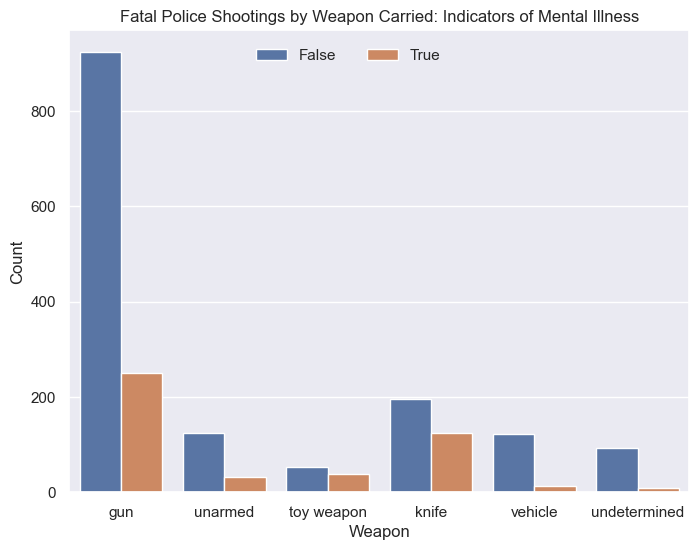

In [771]:
armed_list = (
    df["armed"].value_counts().sort_values(ascending=False).head(10).index.to_list()
)
weapons = df.loc[df["armed"].isin(armed_list[0:6])]

plt.figure(figsize=(8, 6))
g = sns.countplot(data=weapons, x="armed", hue="signs_of_mental_illness")
g.set(
    xlabel="Weapon",
    ylabel="Count",
    title="Fatal Police Shootings by Weapon Carried: Indicators of Mental Illness",
)
sns.move_legend(
    g, "lower center", bbox_to_anchor=(0.45, 0.9), ncol=2, title=None, frameon=False
)
plt.show();

Small difference between signs of mental illness recorded for officers carrying and not carrying a body camera.

In [772]:
df.groupby(by=["body_camera", "signs_of_mental_illness"])["id"].count()

body_camera  signs_of_mental_illness
False        False                      1444
             True                        469
True         False                       168
             True                         61
Name: id, dtype: int64

In [773]:
no_bc_no_somi, no_bc_somi, bc_no_somi, bc_somi = df.groupby(
    by=["body_camera", "signs_of_mental_illness"]
)["id"].count()
print(
    f"Signs of mental illness: When carrying body cam = {no_bc_somi/(no_bc_no_somi+no_bc_somi)*100}%"
)
print(f"Signs of mental illness: whitout body cam = {bc_somi/(bc_somi+bc_no_somi)*100}%")

Signs of mental illness: When carrying body cam = 24.51646628332462%
Signs of mental illness: whitout body cam = 26.637554585152838%


Are there higher amounts of people with signs of mental illness fatally shot on sundays ? 

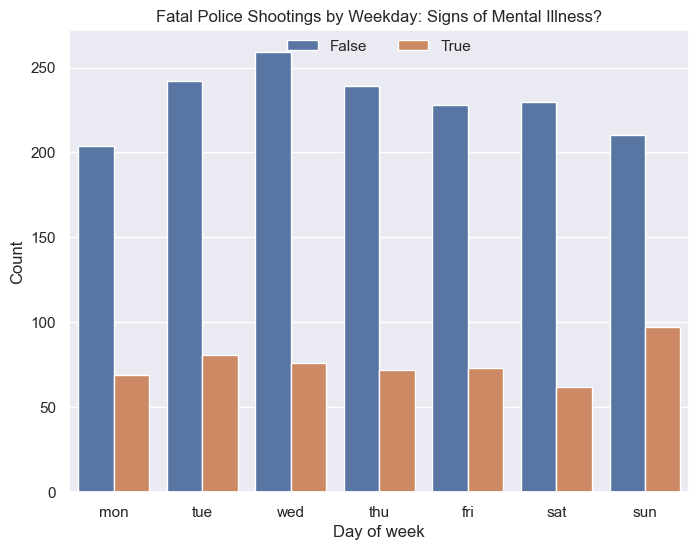

In [774]:
plt.figure(figsize=(8, 6))

g = sns.countplot(
    data=df,
    x="day_of_week_str",
    hue="signs_of_mental_illness",
    order=["mon", "tue", "wed", "thu", "fri", "sat", "sun"],
)

g.set(
    xlabel="Day of week",
    ylabel="Count",
    title="Fatal Police Shootings by Weekday: Signs of Mental Illness?",
)
sns.move_legend(
    g, "lower center", bbox_to_anchor=(0.5, 0.92), ncol=2, title=None, frameon=False
)
plt.show();

# =["mon","tue","wed","thu","fri","sat","sun"]

Created a new data frame with percentage of people with signs of mental illness totally for each given weekday

In [775]:
ab = df.groupby(by=["day_of_week_str", "signs_of_mental_illness"], sort=False)[
    "id"
].count()

dic = {}

for i in range(len(ab)):
    dic[ab.index[i]] = ab[i]


ls = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]

mental_weekday = {}
for i in range(7):
    f = dic[(ls[i], False)]
    t = dic[(ls[i], True)]
    mental_weekday[ls[i]] = t / (t + f) * 100
    print(f"{ls[i]}, percentage total {t/(t+f)*100}")

mon, percentage total 25.274725274725274
tue, percentage total 25.077399380804955
wed, percentage total 22.686567164179106
thu, percentage total 23.15112540192926
fri, percentage total 24.25249169435216
sat, percentage total 21.232876712328768
sun, percentage total 31.596091205211724


/var/folders/dk/d3npzx0d78711ddgq33dpxgh0000gn/T/ipykernel_24431/1328749692.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dic[ab.index[i]] = ab[i]


More people with signs of mental illness are shot on sundays while fewer are fatally shot on saturdays, Why ? 

Initial hypothesis was that maybe intoxication was misinterpreted as sign of mental illness, however with saturday being a "low" day for signs of mental illness this seems unlikely. 

Wanted to see what time of day this happened, however the date column does not contain the hour of day information and only the date. So its impossible to check wether or not this happens during early morning or evening. 

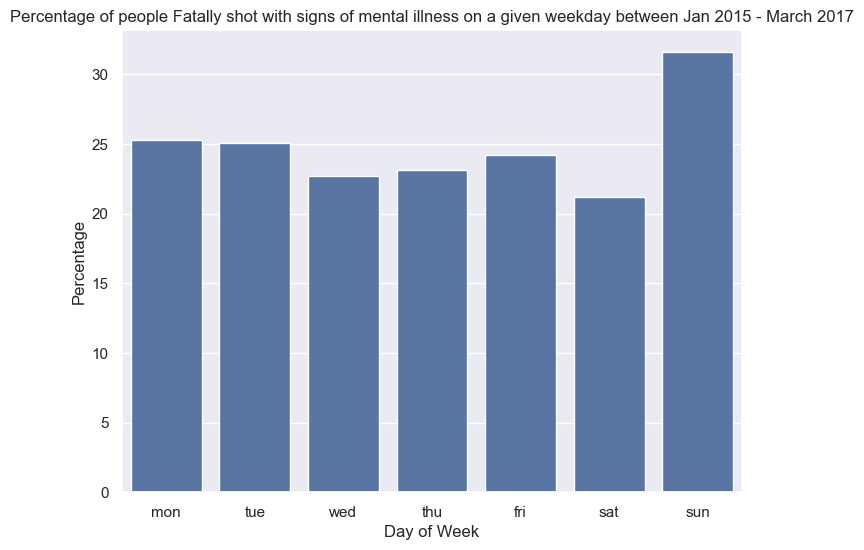

In [776]:
mental_weekday_df = pd.DataFrame.from_dict(mental_weekday, orient="index")
plt.figure(figsize=(8, 6))

g = sns.barplot(
    data=mental_weekday_df,
    x=mental_weekday_df.index,
    y=0,
    order=["mon", "tue", "wed", "thu", "fri", "sat", "sun"],
)

g.set(
    xlabel="Day of Week",
    ylabel="Percentage",
    title="Percentage of people Fatally shot with signs of mental illness on a given weekday between Jan 2015 - March 2017",
)
plt.show();

# Two sample T-test

Null hypothesis: There is no significant difference between the mean age of black and white people fatally shot by police. 

Significance level = 0.05 = 5% (Chance of rejecting null hypothesis, even though its true)

Result, there is a significant difference in mean age between black and white people fatally shot by police.

In [777]:
black = df[df["race"] == "Black"]
white = df[df["race"] == "White"]

black_age = black["age"]
white_age = white["age"]

black_age = black_age.dropna()
white_age = white_age.dropna()

t_stat, p_value = stats.ttest_ind(white_age, black_age)

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis; there is a significant difference between the age of black and white people fatally shot by police."
    )
else:
    print(
        "Fail to reject the null hypothesis; there is no significant difference between the age of black and white people fatally shot by police."
    )

Reject the null hypothesis; there is a significant difference between the age of black and white people fatally shot by police.


In [778]:
print(black_age.isna().sum())
print(white_age.isna().sum())

0
0


Think about stakeholders at the start, how will the data be told, the story, what is important to keep in mind for what to dive into and what problems to be solved. 

Focus on creating a good readme and being presentable for others, add it to other projects even when its not part of the requirements. (Its the face of my projects that should beasy to read and a )

add reflection on what to improve 

simpsons paradox, what is it ? 